# DATA DESCRIPTION

 This dataset includes INPUT features like 
 - Runs 
 - At Bats 
 - Hits
 - Doubles
 - Triples 
 - Homeruns 
 - Walks
 - Strikeouts
 - Stolen Bases 
 - Runs Allowed
 - Earned Runs
 - Earned Run Average (ERA) 
 - Shutouts
 - Saves and Errors.
 
Y: We have to predict the number of Wins.

PROBLEM STATEMENT :

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

LOADING THE DATA

In [2]:
#loading and reading the data
df= pd.read_csv("baseball.csv")

In [3]:
#Checking the Data dimesion
df.shape

(30, 17)

In [4]:
df.columns 

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [5]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


# Lets get some brief information about our Dataset before proceeding.

In [7]:
# Using the info method to get an idea about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [8]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [9]:
#to see the skewness in the dataset
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

From the above describe function we can conclude that there is some kind of skewness in the Dataset as there is a huge difference in mean & std in some cases.

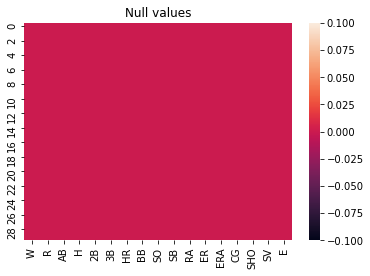

In [10]:
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

From above we can conclude that there is no null values in the datset. 

W          AxesSubplot(0.125,0.71587;0.133621x0.16413)
R       AxesSubplot(0.285345,0.71587;0.133621x0.16413)
AB       AxesSubplot(0.44569,0.71587;0.133621x0.16413)
H       AxesSubplot(0.606034,0.71587;0.133621x0.16413)
2B      AxesSubplot(0.766379,0.71587;0.133621x0.16413)
3B        AxesSubplot(0.125,0.518913;0.133621x0.16413)
HR     AxesSubplot(0.285345,0.518913;0.133621x0.16413)
BB      AxesSubplot(0.44569,0.518913;0.133621x0.16413)
SO     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
SB     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
RA        AxesSubplot(0.125,0.321957;0.133621x0.16413)
ER     AxesSubplot(0.285345,0.321957;0.133621x0.16413)
ERA     AxesSubplot(0.44569,0.321957;0.133621x0.16413)
CG     AxesSubplot(0.606034,0.321957;0.133621x0.16413)
SHO    AxesSubplot(0.766379,0.321957;0.133621x0.16413)
SV           AxesSubplot(0.125,0.125;0.133621x0.16413)
E         AxesSubplot(0.285345,0.125;0.133621x0.16413)
dtype: object

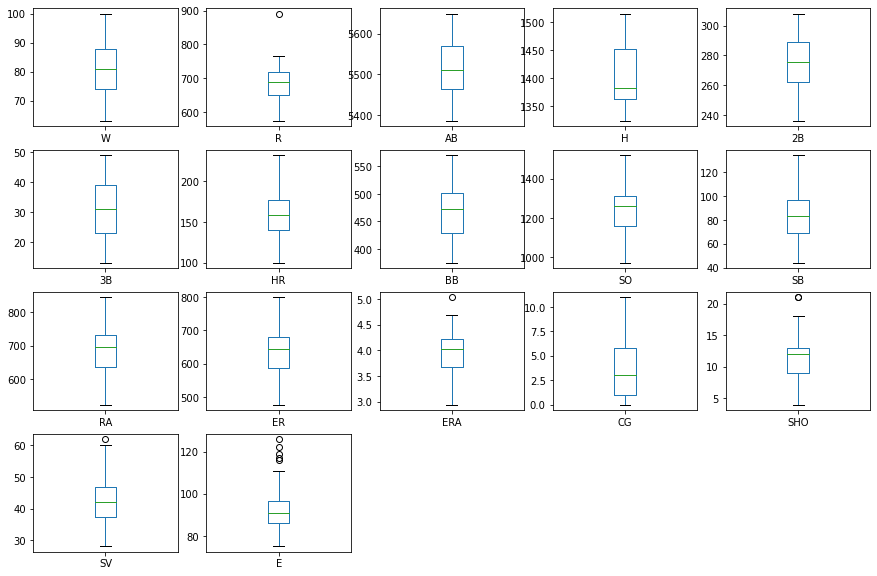

In [11]:
#Plotting bosplot to check the outliers in the datset
df.plot(kind='box',subplots= True,layout=(4,5),figsize=(15,10))

From the above we can see that there is not much of outliers in the dataset as number of black dots are near to nill.

# Removing skewness from the Dataset to make it close to zero to get a better score.

In [12]:
#Rectifying the skewed dataset

skew=('R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E')
for col in skew :
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [13]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,6.586172,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,2.197225,4.043051,4.488636
1,83,6.546785,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,2.564949,3.828641,4.465908
2,81,6.507278,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,2.397895,3.663562,4.382027
3,76,6.434547,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,2.302585,3.637586,4.624973
4,74,6.536692,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,2.564949,3.583519,4.465908


In [14]:
#checking the newly skewed Data
df.skew()

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.589640
SV     0.163057
E      0.632916
dtype: float64

# Lets scale the dataset first as the dataframe needs normalization.

In [15]:
# apply the maximum absolute scaling in Pandas using the .abs() and .max() methods
def maximum_absolute_scaling(df):
    # copy the dataframe
    df_scaled = df.copy()
    # apply maximum absolute scaling
    for column in df_scaled.columns:
        df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
    return df_scaled
    
# call the maximum_absolute_scaling function
df_scaled = maximum_absolute_scaling(df)



In [16]:
df_scaled

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.95,0.969486,0.986900,0.998369,0.974026,0.857143,0.599138,0.671930,0.640975,0.776119,0.759479,0.752190,0.740079,0.442114,0.710836,0.975844,0.926603
1,0.83,0.963689,0.967782,0.984165,0.899351,0.897959,0.672414,0.770175,0.832675,0.522388,0.829384,0.817272,0.807540,0.442114,0.829801,0.924093,0.921911
2,0.81,0.957873,0.962825,0.988740,0.983766,0.591837,0.607759,0.935088,0.762187,0.641791,0.758294,0.730914,0.728175,1.000000,0.775756,0.884249,0.904595
3,0.76,0.947167,0.979465,0.987364,0.844156,0.551020,0.586207,0.708772,0.810935,0.507463,0.830569,0.804756,0.789683,0.836829,0.744922,0.877979,0.954747
4,0.74,0.962203,0.992211,1.000000,0.938312,1.000000,0.650862,0.798246,0.829381,0.619403,0.951422,0.933667,0.920635,0.836829,0.829801,0.864929,0.921911
5,0.93,1.000000,0.975217,0.996811,1.000000,0.346939,1.000000,1.000000,0.758235,0.656716,0.793839,0.762203,0.753968,0.836829,0.775756,0.858130,0.926603
6,0.87,0.977391,0.985484,0.988936,0.883117,0.387755,0.913793,0.971930,0.808300,0.470149,0.827014,0.816020,0.799603,0.557886,0.520678,0.939342,0.937886
7,0.81,0.967236,0.970968,0.986273,0.798701,0.408163,0.935345,0.733333,0.876812,0.328358,0.821090,0.808511,0.803571,0.000000,0.775756,0.913364,0.899368
8,0.80,0.952275,0.970968,0.987562,0.902597,0.653061,0.719828,0.764912,0.862978,0.649254,0.760664,0.755945,0.742063,0.278943,0.829801,0.992213,0.942232
9,0.78,0.974280,0.998407,0.998187,0.954545,0.673469,0.693966,0.838596,0.756258,0.529851,0.892180,0.868586,0.855159,0.557886,0.775756,0.896319,0.946489


In [17]:
#Lets see if everything is alright till the last row.
df_scaled.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,0.92,0.957433,0.953266,0.983862,0.853896,0.530612,0.806034,0.987719,0.828722,0.440299,0.704976,0.692115,0.682540,0.783092,1.000000,0.934365,0.894006
26,0.84,0.963689,0.985130,0.997363,0.935065,0.795918,0.586207,0.801754,0.763505,0.694030,0.742891,0.747184,0.738095,0.836829,0.952572,0.902136,0.901998
27,0.79,0.968672,1.000000,0.998095,0.938312,0.979592,0.663793,0.859649,0.864295,0.985075,0.844787,0.824781,0.801587,0.278943,0.829801,0.918788,0.921911
28,0.74,0.953638,0.966012,0.981613,0.844156,0.734694,0.637931,0.747368,0.874177,0.611940,0.866114,0.819775,0.811508,0.278943,0.629532,0.902136,0.935678
29,0.68,0.972102,0.986369,0.996718,0.889610,1.000000,0.801724,0.680702,0.845191,0.723881,1.000000,1.000000,1.000000,0.647685,0.520678,0.871542,0.942232


# lets have an idea about the relationship between our Features(Correlation)

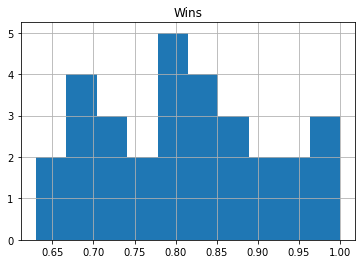

In [54]:
#Univariate Analysis

df_scaled['W'].hist(grid=True)
plt.title('Wins')
plt.show()

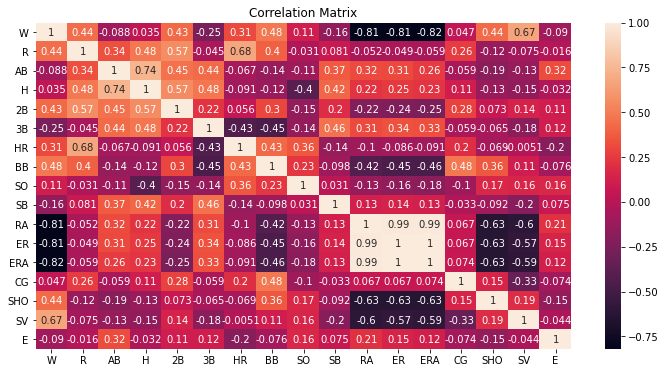

In [19]:
#Multivariate Analysis
corr_mat=df_scaled.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

From the above plot we can see that there is a huge correlation between the following:
    
- Runs Allowed(RA)
- Earned Runs(ER)
- Earned Run Average (ERA)

# RANDOM STATE DETECTION

In [20]:
x=df_scaled.drop('W', axis=1)
y=df_scaled['W']

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
from sklearn.metrics import r2_score

for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state=i)
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test= LR.predict(x_test)
    print(f'at random state {i}, the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'at random state {i}, the testing accuracy is: {r2_score(y_test,pred_test)}')
    print('\n')

at random state 1, the training accuracy is: 0.9919479756540683
at random state 1, the testing accuracy is: 0.007765285691531343


at random state 2, the training accuracy is: 0.9890245202413702
at random state 2, the testing accuracy is: -1.1125589332722443


at random state 3, the training accuracy is: 0.9653174332414531
at random state 3, the testing accuracy is: 0.6117142581625212


at random state 4, the training accuracy is: 0.9671929048409923
at random state 4, the testing accuracy is: 0.7641807371273005


at random state 5, the training accuracy is: 0.9498618614709624
at random state 5, the testing accuracy is: 0.9173748390527872


at random state 6, the training accuracy is: 0.9576993344682359
at random state 6, the testing accuracy is: 0.5287622604849105


at random state 7, the training accuracy is: 0.9698947412336592
at random state 7, the testing accuracy is: 0.6043265953020432


at random state 8, the training accuracy is: 0.9792394855211719
at random state 8, the testing

at random state 63, the training accuracy is: 0.9648139155646815
at random state 63, the testing accuracy is: 0.3347992384218279


at random state 64, the training accuracy is: 0.9542445249318356
at random state 64, the testing accuracy is: 0.7459078614909651


at random state 65, the training accuracy is: 0.9550555013499968
at random state 65, the testing accuracy is: 0.692490024762548


at random state 66, the training accuracy is: 0.9857907654746932
at random state 66, the testing accuracy is: 0.35608696451721944


at random state 67, the training accuracy is: 0.9526373608575655
at random state 67, the testing accuracy is: 0.7600537402614943


at random state 68, the training accuracy is: 0.9801965634204356
at random state 68, the testing accuracy is: -0.5357220742923985


at random state 69, the training accuracy is: 0.979982644947345
at random state 69, the testing accuracy is: 0.7075894186144448


at random state 70, the training accuracy is: 0.9800240941499158
at random state 70

WE FOUND THE BEST RANDOM_STATE AT 5 FOR TEST_SIZE=.30

# MODEL SELECTION

Now our data is ready! lets apply our model which is going to be the Linear Regression because our Target variable 'WINS'is continuous. Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable.

# FIRST MODEL using Linear Regression

In [98]:
X=df_scaled.drop('W', axis=1)
y=df_scaled['W']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=5)

In [99]:
#Creating and Training The Model

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [100]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.024294074713569234
MSE: 0.000663653453237737
RMSE: 0.025761472264560832


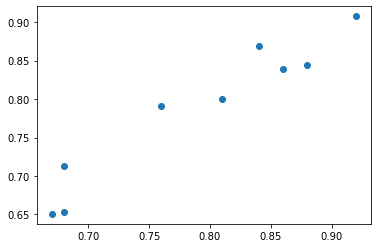

In [101]:
#Lets plot the y_test vs the predictions
plt.scatter(x=y_test,y=pred)

As we can see that we kind of have a straight line so I am not 100% sure that this is the best model we can apply on our data.

LETS CHECK ACTUAL VS PREDICTED FOR THIS MODEL.



,Y Test,Pred
11,0.86,0.838491
29,0.68,0.653170
23,0.67,0.650701
25,0.92,0.907640
18,0.68,0.713419


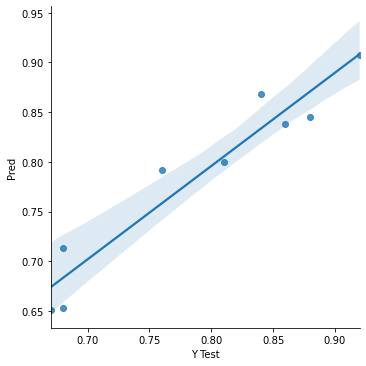

In [102]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# SECOND MODEL Using Random Forest Regressor

In [103]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [104]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.055255555555555676
MSE: 0.0035746900000000106
RMSE: 0.059788711309075815


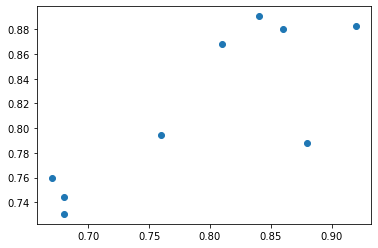

In [105]:
plt.scatter(x=y_test,y=pred)

LETS CHECK ACTUAL VS PREDICTED FOR THIS MODEL

,Y Test,Pred
11,0.86,0.8799
29,0.68,0.7443
23,0.67,0.7596
25,0.92,0.8830
18,0.68,0.7306


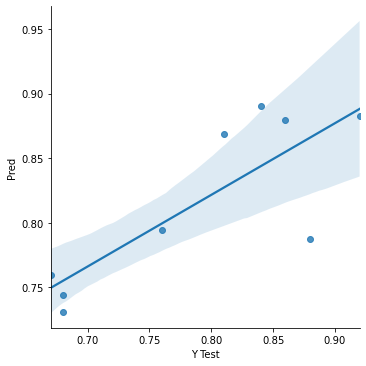

In [106]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# THIRD MODEL using Decision Tree Regression

In [107]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

In [108]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.06777777777777777
MSE: 0.005766666666666665
RMSE: 0.07593857166596343


Text(0, 0.5, 'Predicted Y')

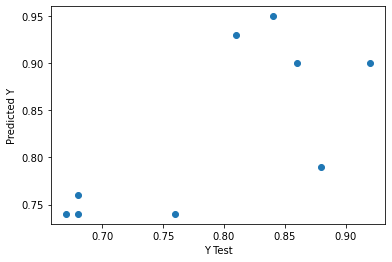

In [109]:
#Lets plot the y_test vs the predictions
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

LETS CHECK ACTUAL VS PREDICTED FOR THIS MODEL.

,Y Test,Pred
11,0.86,0.90
29,0.68,0.74
23,0.67,0.74
25,0.92,0.90
18,0.68,0.76


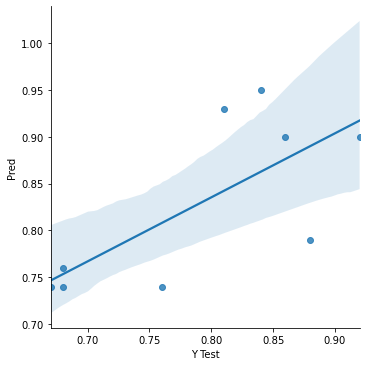

In [110]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [111]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LinearRegression(),X,y, cv=5)
print('Cross validation score of LinearRegression model :',scr.mean())

Cross validation score of LinearRegression model : -0.33434511806903106


In [112]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(RandomForestRegressor(),X,y, cv=5)
print('Cross validation score of RandomForestRegressor model :',scr.mean())

Cross validation score of RandomForestRegressor model : -0.7770460253272053


In [113]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(DecisionTreeRegressor(),X,y, cv=5)
print('Cross validation score of DecisionTreeRegressor model :',scr.mean())

Cross validation score of DecisionTreeRegressor model : -2.477582410240026


# GRIDSEARCHCV FOR BEST PARAMETERS

In [114]:
from sklearn.model_selection import GridSearchCV

In [121]:
#creating parameters list to pass in GridSearchCv

parameters = {'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}

In [122]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [123]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [124]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [125]:
GCV.best_params_

{'criterion': 'mse', 'max_features': 'sqrt'}

In [126]:
GCV_pred=GCV.best_estimator_.predict(X_test)

# Saving the best model using pkl

In [127]:
import joblib
filename = 'df_scaled_predictor.pkl'
joblib.dump(GCV.best_estimator_, filename)

['df_scaled_predictor.pkl']